# BCB546X Python Assignment Jupyter Notebook
## Christian Montes-Serey

Loading (importing) the required packages

In [1]:
from Bio import SeqIO
from Bio.Data import CodonTable
import pandas as pd

## First function ##
Dr. X: this gets sequences.
Please finish documenting this function with comments, or in notebook markdown text.
Your descriptions of all functions should contain information about what the function does, as well as information about the return types and arguments.

In [2]:
def get_sequences_from_file(fasta_fn):
    sequence_data_dict = {}
    for record in SeqIO.parse(fasta_fn, "fasta"):
        description = record.description.split()
        species_name = description[1] + " " + description[2]
        sequence_data_dict[species_name] = record.seq
    return(sequence_data_dict)

**First function explained:**  
We are defining (creating) a function called `get_seqences_from_file`. We have to provide the `fasta_fn` argument when using this function. This is, providing a **fasta** format file.  
The `get_seqences_from_file` function does the following:  
1. Creates an empty dictionary object, called `sequence_data_dict`  
2. Starts a `for` loop that goes through each record in the provided **fasta** file (the `SeqIO.parse` function is used to access the file content and the `record` variable is used to store the parsed record). Each loop do:  
2.1. Creates an object called `description`that stores the "fasta header" of the record. The `split()` function separate the header text into a `list` of elements, using the blank space to define each element.  
2.2. Creates an object called `species_name` that have the second and third element of the `description` list object (with a blank space between the elements). This gave us exactly the taxonomic binomial nomenclature for the species whose DNA sequence belongs to.  
2.3. Add the DNA sequence of `record` to our `sequemce_data_dict` dictionary using the species taxonimic name as the index.  
3. After looping through every `record` element of `fasta_fn`, the function uses the `return` function to return the created dictionary.

## Second function ##
The following function takea a string of DNA sequence and makes the translation until it reaches the first "stop" codon. This function uses the "Vertebrate Mitochondrial" codon table.

In [227]:
def translate_function(string_nucleotides):
    mito_table = CodonTable.unambiguous_dna_by_name["Vertebrate Mitochondrial"]
    aa_seq_string = ""
    i = 0
    while i < len(string_nucleotides):
        codon = string_nucleotides[i:i+3]
        if (codon == 'TAG' or codon == 'TAA' or codon == 'AGA' or codon == 'AGG'):
            break
        aa = mito_table.forward_table[codon]
        aa_seq_string += aa
        i += 3
    return(aa_seq_string)

**Second function explained:**  
Here, we are creating a function called `translate_function` that requires the `string_nucleotides` input argument. This argument must be a DNA sequence string. It is adviced to provide the sequence as a `string` type object. If the sequence is provided as a `Seq` type object, we can coerce it to `string` type using `str(string_nucleitides)`.  
  
The function is divided into the following steps:  
1. Creates a object called "mito_table" wich contains the codon usage table.
2. Creates an empty `string`-type object called "aa_seq_string"
3. Creates an numeric object called "i" and sets the value of our object "i" to 0. This object is going to be used later as a variable.
4. Starts a "while" loop

## Third function ##

In [218]:
from Bio.Seq import Seq
from Bio.Alphabet import IUPAC
def imp_translate_function(string_nucleotides):
    coding_dna = Seq(string_nucleotides, IUPAC.unambiguous_dna)
    aa_seq_string = coding_dna.translate(table="Vertebrate Mitochondrial", to_stop=True)
    return(aa_seq_string)

**Third function explained:**  
Components of this function were taken from [biopython cookbook](http://biopython.org/DIST/docs/tutorial/Tutorial.html#htoc25)

## Fourth function ##

In [122]:
from Bio.SeqUtils.ProtParam import ProteinAnalysis
def compute_molecular_weight(aa_seq):
    analysed_seq = ProteinAnalysis(aa_seq)
    seq_aa_weight = analysed_seq.molecular_weight()
    return(seq_aa_weight)

**Fourth function explained:**  


## Fifth function ##

In [169]:
def get_GC_content(string_nucleotides):
    count = 0
    for base in string_nucleotides:
        if (base == 'G' or base == 'C'):
            count += 1
#            print(count)
    return(count / len(string_nucleotides)*100)

**Fifth function explained:**

# Main #

In [144]:
cytb_seqs = get_sequences_from_file("penguins_cytb.fasta")

In [165]:
penguins_df = pd.read_csv("penguins_mass.csv") # Includes only data for body mass 
species_list = list(penguins_df.species)

In [166]:
penguins_df['molecular_weight'] = 'NaN'
penguins_df['GC_content'] = 'NaN'

In [167]:
penguins_df

,species,mass,molecular_weight,GC_content
0,Aptenodytes forsteri,28.00,NaN,NaN
1,Aptenodytes patagonicus,13.40,NaN,NaN
2,Eudyptes chrysocome,2.80,NaN,NaN
3,Eudyptes chrysolophus,4.50,NaN,NaN
4,Eudyptes sclateri,4.25,NaN,NaN
5,Eudyptula minor,1.60,NaN,NaN
6,Pygoscelis adeliae,4.60,NaN,NaN
7,Pygoscelis antarctica,4.10,NaN,NaN
8,Pygoscelis papua,6.10,NaN,NaN
9,Spheniscus demersus,3.20,NaN,NaN


In [235]:
for key, value in cytb_seqs.items():
    aa_seq = translate_function(str(value))
    mol_wght = compute_molecular_weight(str(aa_seq))
    GC_con = get_GC_content(value)
    penguins_df.loc[penguins_df['species'].str.contains(key), 'molecular_weight'] = mol_wght
    penguins_df.loc[penguins_df['species'].str.contains(key), 'GC_content'] = GC_con
#    print(aa_seq)

In [236]:
penguins_df

,species,mass,molecular_weight,GC_content
0,Aptenodytes forsteri,28.00,42459.6,48.3815
1,Aptenodytes patagonicus,13.40,42563.7,49.6938
2,Eudyptes chrysocome,2.80,42475.6,51.1811
3,Eudyptes chrysolophus,4.50,42445.5,50.9186
4,Eudyptes sclateri,4.25,42475.6,50.8311
5,Eudyptula minor,1.60,42491.6,49.2563
6,Pygoscelis adeliae,4.60,42458.6,49.0814
7,Pygoscelis antarctica,4.10,42404.5,47.769
8,Pygoscelis papua,6.10,42595.9,47.1566
9,Spheniscus demersus,3.20,42431.5,48.294


In [182]:
import matplotlib.pyplot as plt
import seaborn as sns

In [183]:
%matplotlib inline

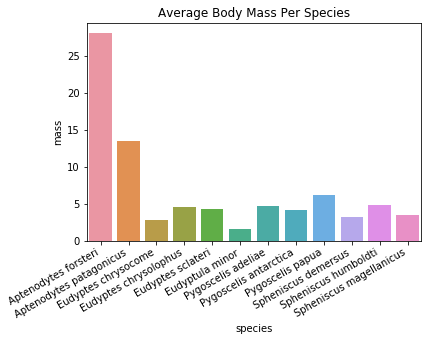

In [200]:
g = sns.barplot("species","mass", data=penguins_df)
g.set_xticklabels(g.get_xticklabels(), rotation=30, ha='right')
g.set_title('Average Body Mass Per Species')